In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


In [2]:
%matplotlib inline

In [3]:
def default_predict(x, b0, b1):
    return [ (b0 + b1 * i) for i in x]

## Linear Regression

If two variables have high correlation then we can estimate the one variable using linear regression.

### Single linear regression

In [4]:
data = pd.DataFrame([(1, 8), (2, 16), (3, 40), (4, 49), (5, 56), (6,61), (7,56), (8,84), (9,88), (10,99)], columns=['x','y'])

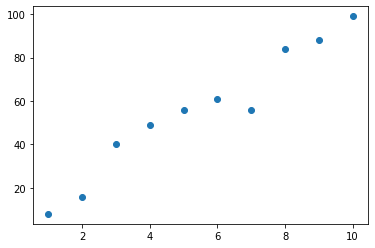

In [5]:
##Lets plot this on a graph
plt.scatter('x','y', data=data)

### Now we will try to fit a line to these points

Equation of line is y = mx+c or  y = b0 + b1*X

- b0 is y intercept
- b1 is x coefficient

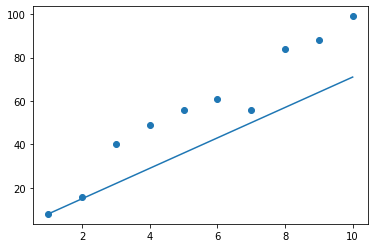

In [6]:
plt.scatter('x','y', data=data)
b0 = 1
b1 = 7
plt.plot(data['x'], default_predict(data['x'], b0, b1))

### Is this a good fit ?? | How to find a goot fit ??
change b0 and b1 of the line equation

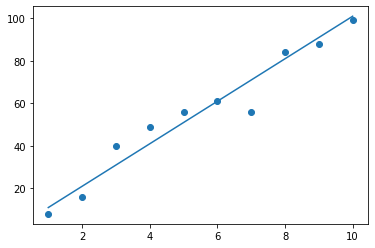

In [7]:
plt.scatter('x','y', data=data)
b0 = 1
b1 = 10
plt.plot(data['x'], default_predict(data['x'], b0, b1))

### Is this a perfect fit? How to estimate perfect fit?

Get the difference between the actual point and estimated line.
We square the differences to avoid difference cancellation for points above the line and below the line.
and divide by number of points 

y^ - estimated value 

MSE = sum((Y^ -  Y) power 2)/n 


In [8]:
def mse(actual,predicted):
    diff = 0
    n = min(len(actual), len(predicted))
    for i in range(n):
        diff += (predicted[i] - actual[i])**2
    return diff/n

In [9]:
#MSE for b0 = 1, b1 = 7
predicted = default_predict(data['x'], 1, 7)
print(predicted)
mse(data['y'], predicted)

[8, 15, 22, 29, 36, 43, 50, 57, 64, 71]


357.4

In [10]:
#MSE for b0 = 1, b1 = 10
predicted = default_predict(data['x'], 1, 10)
mse(data['y'], predicted)

45.1

In [11]:
#MSE for b0 = 1, b1 = 11
predicted = default_predict(data['x'], 1, 11)
mse(data['y'], predicted)

95.0

In [12]:
#MSE for b0 = 1.4, b1 = 9.81
predicted = default_predict(data['x'], 1.4, 9.81)
mse(data['y'], predicted)

43.88785000000002

### So our goal is to minimize this error
This can be acheived in two methods.

1. Least squares method (equation and matrix)
2. gradient descent

## Gradient descent

Our goal is to minimize the MSE. 
So lets choose random b0 and b1 value and plot the MSE for the same.

In [13]:
#lets fix b0 as 1.4 and change b1
b0 = 1.4
b1 = np.arange(6,14,0.3)
print(b0, b1)
MSE_arr = [mse(data['y'], default_predict(data['x'], b0 , b1[i]) )  for i in range(len(b1))]
print("MSE : ", MSE_arr)

1.4 [ 6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1  8.4  8.7  9.   9.3  9.6  9.9
 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3 12.6 12.9 13.2 13.5 13.8]
MSE :  [598.3000000000001, 514.105, 436.84000000000003, 366.50500000000005, 303.1, 246.62500000000023, 197.08000000000018, 154.4650000000003, 118.78000000000011, 90.025, 68.2000000000001, 53.30500000000012, 45.34000000000006, 44.30499999999999, 50.19999999999994, 63.02499999999984, 82.77999999999983, 109.46499999999985, 143.0799999999997, 183.6249999999995, 231.0999999999995, 285.50499999999954, 346.83999999999924, 415.10499999999894, 490.29999999999893, 572.4249999999993, 661.4799999999987]


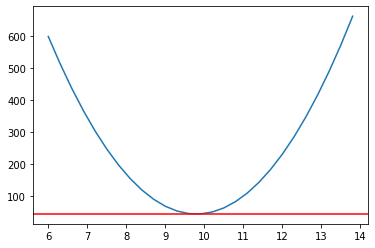

In [14]:
plt.plot(b1, MSE_arr)
plt.axhline(44.3, c= 'r')

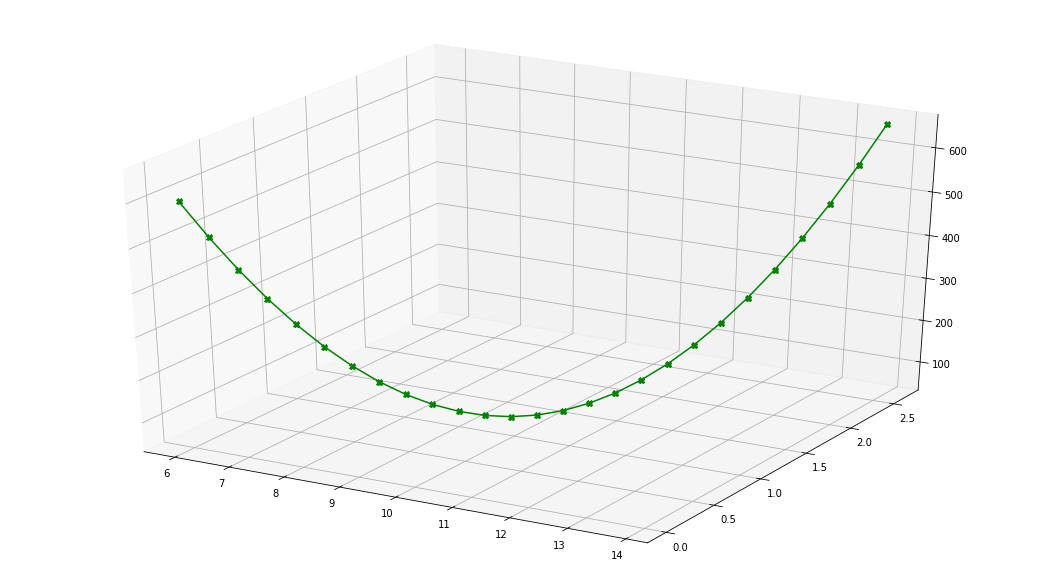

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")
fig.set_size_inches(18.5, 10.5)

z_line = MSE_arr
x_line = np.arange(6,14,0.3)
y_line = np.arange(0,2.7,0.1)

ax.plot(x_line, y_line, z_line, color='green', marker='X')

So for particular value of b0 and b1 the MSE is very low 1

f(b0,b1) = Σ((Y’ - Y)^2)/n

y’ = b0 + b1 * X 

f(b0,b1) = Σ((b0 + b1 * X - Y)^2)/n

f(b0,b1) =  1/n Σ((b0 + b1 * X - Y)^2)


We have to minimize this function f(b0,b1) i.e reduce the error.
At some values for b0 and b1 the error will be ~zero.

***

- So change in predicted y with change in b0 and b1 can be obtained by differentiation.

- So what should be the value for b0 and b1? Do we need to increase it or decrease it?

- If error(differentiation value i.e change in y wrt b0 and b1) is high then b0 and b1 are changed accordingly.

We add α learning rate to change b0 and b1 smoothly.

b0 = b0 - α δy∕δb0
b1 = b1 - α δy∕δb1

***
diferentiate f(b0,b1) with resprect to b0 and b1 and apply chain rule.

δy∕δb0 = 1/2nΣ(b0 + b1 * X - Y)

δy∕δb1 = 1/2nΣ(b0 + b1 * X - Y).X


So b0 and b1 will change using the below equation for every iteration.

b0 = b0 - α  1/2nΣ(b0 + b1 * X - Y) 
b1 = b1 - α  1/2nΣ(b0 + b1 * X - Y).X


Now lets predict y using the above equation.

b0 :  1 b1 : 7 Error : 357.4
b0 :  1.81 b1 : 12.26725 Error : 290.1962161562502
b0 :  1.1310062499999998 b1 : 7.581767031249998 Error : 239.2853221915574
b0 :  1.7744700039062504 b1 : 11.738886245019533 Error : 197.21508345426568
b0 :  1.2425527863305663 b1 : 8.039828207116027 Error : 165.65603677481306
b0 :  1.7544723900571306 b1 : 11.320679001151964 Error : 139.2896583292208
b0 :  1.338562045237484 b1 : 8.400267361494125 Error : 119.7501769294555
b0 :  1.7465604185647257 b1 : 10.989448575512634 Error : 103.20234365804649
b0 :  1.4221340393705149 b1 : 8.68367320682392 Error : 91.12259703660366
b0 :  1.748017205525411 b1 : 10.726897552168385 Error : 80.71865476714873
b0 :  1.4957195184028345 b1 : 8.906296896683465 Error : 73.26426385285184
b0 :  1.7567018958947398 b1 : 10.518582349196741 Error : 66.7087070291811
b0 :  1.561256655070899 b1 : 9.080965746848516 Error : 62.118839941893384
b0 :  1.770928241934012 b1 : 10.353101417633269 Error : 57.97682139539885
b0 :  1.6202789399881623 b1 

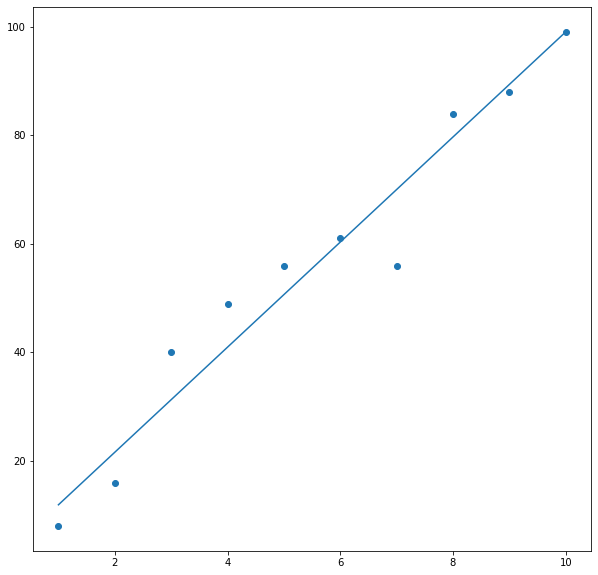

In [16]:
#initialize b0 and b1 =0
b0 = 1
b1 = 7
alpha = 0.1

iterations = 50
n = data.shape[0]

fig,axes = plt.subplots()
fig.set_size_inches(10,10)
axes.scatter('x','y', data=data)

iteration_log = []

for iteration in range(iterations):
    predicted_y = default_predict(data['x'], b0, b1)
    error = mse(data['y'], predicted_y)
    
    print("b0 : ", b0, "b1 :", b1, "Error :", error)
    iteration_log.append({"b0" : b0, "b1": b1, "error": error})
    
    #axes.plot(data['x'], predicted_y,)
    b0 = b0 - alpha *  (1/(2*n)) *  (sum(  [ ((b0 + b1 * data['x'][i]) - data['y'][i]) for i in range(n) ] ))
    b1 = b1 - alpha *  (1/(2*n)) *  (sum(  [ ((b0 + b1 * data['x'][i]) - data['y'][i]) * data['x'][i] for i in range(n) ] ))

axes.plot(data['x'], predicted_y,)
plt.show()
    


In [17]:
iterationDf = pd.DataFrame(iteration_log)

In [18]:
minimum_error = iterationDf['error'].min()
minimum_error

43.31063861637805

In [19]:
iterationDf[iterationDf['error'] == minimum_error]

,b0,b1,error
49,2.243753,9.682066,43.310639


The above equation can be expressed in matrix format

b0 :  1 b1 : 12 Error : 221.9
b0 :  0.9435 b1 : 11.586500000000001 Error : 159.07319912500012
b0 :  0.89865375 b1 : 11.2541525 Error : 118.50525362192033
b0 :  0.8631712875 b1 : 10.987015165625 Error : 92.30968468074371
b0 :  0.8352125140078126 b1 : 10.772277535835936 Error : 75.39425272840671
b0 :  0.8132988192022853 b1 : 10.599645766052303 Error : 64.4709372796849
b0 :  0.7962420665398355 b1 : 10.460848238559171 Error : 57.41668843379212
b0 :  0.7830875296467592 b1 : 10.349238295806686 Error : 52.8606689628712
b0 :  0.7730680388638416 b1 : 10.259475016798612 Error : 49.91773965829181
b0 :  0.7655671357075605 b1 : 10.187266704996125 Error : 48.016372839617446
b0 :  0.7600894656416293 b1 : 10.129164768052412 Error : 46.78753741219988
b0 :  0.7562369871919797 b1 : 10.082398089897177 Error : 45.992952791403724
b0 :  0.7536898547838474 b1 : 10.044739940444192 Error : 45.47876300549659
b0 :  0.752191057147713 b1 : 10.014401030902128 Error : 45.14562441515345
b0 :  0.7515340735121658 b1 : 9

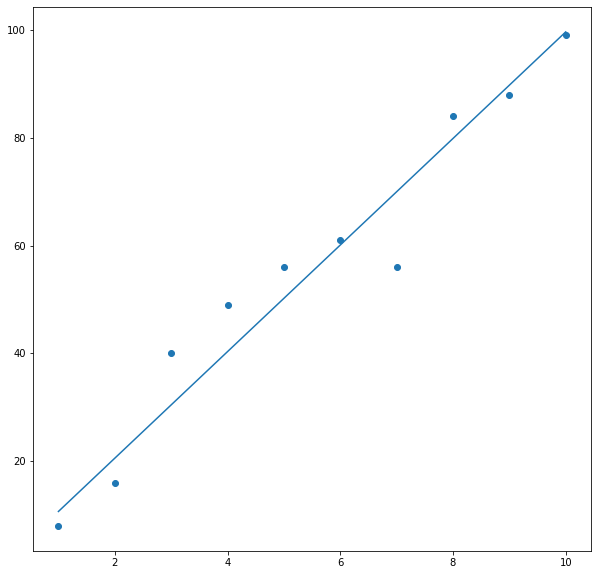

In [20]:
b0 = 1
b1 = 12
alpha = 0.01

iterations = 50
n = data.shape[0]

X = pd.DataFrame([1]*n)
X[1] = data['x']

Y = data['y']

fig,axes = plt.subplots()
fig.set_size_inches(10,10)
axes.scatter('x','y', data=data)

params = pd.Series([b0, b1])

for iteration in range(iterations):
    predicted_y = X @ params
    error = mse(Y, predicted_y)
    
    print("b0 : ", params[0], "b1 :", params[1], "Error :", error)
    
    params = params - (alpha *  (1/(2*n))) * X.T @ ((X @ params) - Y)
    
axes.plot(data['x'], predicted_y)
plt.show()
   

    


 ## Least Squares Method

#### Equation form
f(b0,b1) = Σ((b0 + b1 * X - Y)^2)

We know that we need to minimize this function f.

At some values of b0 and b1 the f will be minimum.

Differntiate this function keeping f(b0,b1) as 0.

Then solve two equations with two unknows

b0 = (Σy − b1*Σx) / n

b1 = ( (n * Σ(x * y)) − Σx * Σy ) / ( (n * Σ(x^2)) − (Σx)^2)

In [21]:
def sse(actual,predicted):
    diff = 0
    n = min(len(actual), len(predicted))
    for i in range(n):
        diff += (predicted[i] - actual[i])**2
    return diff

In [22]:
t = data.copy()
t['x2'] = t['x'] ** 2
t['xy'] = t['x'] * t['y']
t

,x,y,x2,xy
0,1,8,1,8
1,2,16,4,32
2,3,40,9,120
3,4,49,16,196
4,5,56,25,280
5,6,61,36,366
6,7,56,49,392
7,8,84,64,672
8,9,88,81,792
9,10,99,100,990


In [23]:
n = t.shape[0]

In [24]:
b1 = ( (n * t['xy'].sum()) - (t['x'].sum() * t['y'].sum()) ) / ((n * t['x2'].sum()) - t['x'].sum()**2)

In [25]:
b0 = (t['y'].sum() - b1*t['x'].sum()) / n

In [26]:
b0, b1

(3.4, 9.50909090909091)

In [27]:
t['predicted_y'] = b0 + b1*t['x']
mse(t['y'], t['predicted_y'])

43.021818181818176

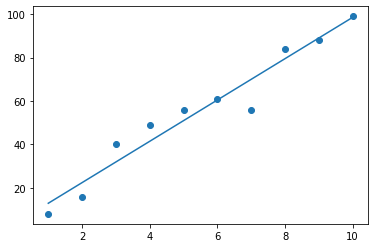

In [28]:
plt.scatter('x','y', data=data)
plt.plot(data['x'], default_predict(data['x'], b0, b1))

#### Matrix Form

f(b0,b1) = Σ((b0 + b1 * X - Y)^2)
e = (b0 + b1 * X - Y)
f(b0,b1) = Σe^2

Our goal is to minimize f(b0,b1). fix b0.

f(b1) = Σe^t * e
f(b1) = Σ (y - b1x )^t * (y - b1x)
f(b1) = Σ (y^t - b1^t * x^t ) * (y - b1x)


![alt text](regression_matrix_derivation_0.png)

![alt text](regression_matrix_derivation_1.png)

b1 = (X^t*X)-1 X^t * Y

b0 = (Σy − b1*Σx) / n

In [29]:
x = np.array(data['x'])
y = np.array(data['y'])

In [30]:
b1 = 1 / (x.T @ x) * (x @ y)

In [31]:
b0 = (y.sum() - b1*x.sum()) / n

In [32]:
b0, b1

(0.7285714285714221, 9.994805194805195)

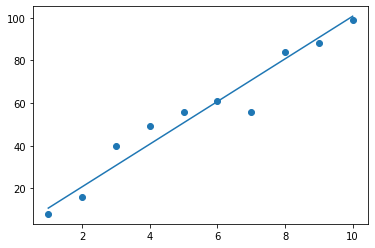

In [33]:
plt.scatter('x','y', data=data)
plt.plot(data['x'], default_predict(data['x'], b0, b1))

In [34]:
mse(y, default_predict(x,b0,b1))

44.96814471243046

Which loss function to choose SSE, MSE, SAE, etc.,

https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f